
**fungsi alih**

**H(z)=(z^2+0.2z+1)z^2 **

mencari fungsi alih, pole dan akar akarnya


In [36]:
import numpy as np

b = [1, 0.2, 1]
a = [1, 0, 0]

poles = np.roots(a)
zeros = np.roots(b)

print("")
print("The poles are:  ", poles)
print("The zeros are:  ", zeros)


The poles are:   [0. 0.]
The zeros are:   [-0.1+0.99498744j -0.1-0.99498744j]


Frekuensi uji adalah 1 KHz. Kecepatan pengambilan sampel adalah 32 KHz, yang sesuai dengan satu revolusi di sekitar unit circle.
Temukan nilai frekuensi kompleks untuk titik ini di bidang Z.

In [0]:
#frekuensi komplek

angle = (1/32) * 2 * np.pi
frequency = np.exp(1j*angle)

print("")
print(frequency)




(0.9807852804032304+0.19509032201612825j)


**Hitung jarak dari titik frekuensi ke nol**

In [0]:
dist_one = frequency - zeros[0]
dist_two = frequency - zeros[1]

dist_one_mag = np.absolute(dist_one)
dist_two_mag = np.absolute(dist_two)

print("")
print("Jarak dari 1 KHz ke nol adalah:")
print(dist_one_mag)
print(dist_two_mag)

print("")
print("Dan jika dikalikan bersama menghasilkan")
print(dist_one_mag * dist_two_mag)


Jarak dari 1 KHz ke nol adalah:
1.3445936996231913
1.6076012861076316

Dan kita dikalikan bersama
2.161570560806461



**Membuat plot untuk pole zero **

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


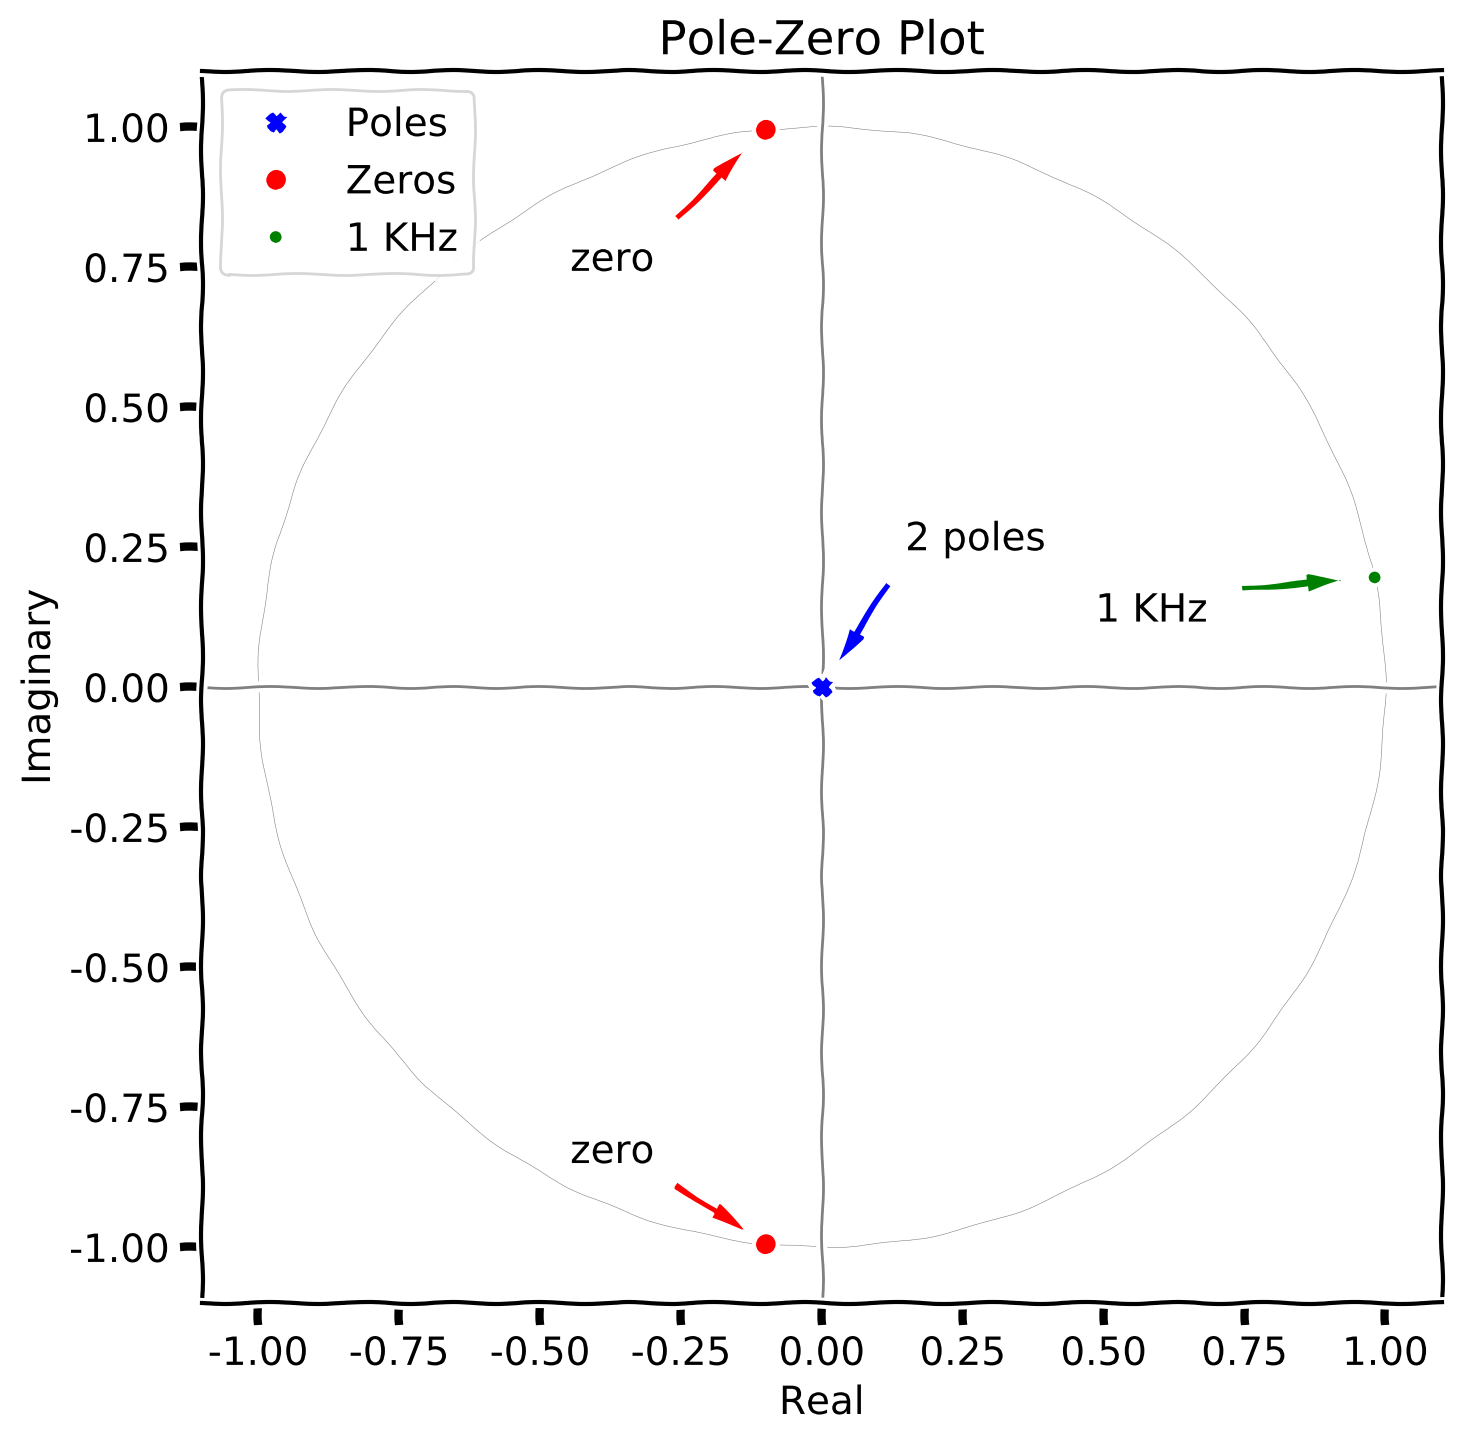

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcdefaults() 
plt.xkcd()

# Reset default params
#sns.set()

# Set context to paper | talk | notebook | poster
# sns.set_context("poster")

fig = plt.figure(figsize=(8,8))  # sets size and makes it square
ax = plt.axes()                  # ax.set_aspect(1)

# plot unit circle

theta = np.linspace(-np.pi, np.pi, 201)
plt.plot(np.sin(theta), np.cos(theta), color = 'gray', linewidth=0.2)

# plot x-y axis

ax.axhline(y=0, color='gray', linewidth=1)
ax.axvline(x=0, color='gray', linewidth=1)

# plot poles and zeros

plt.plot(np.real(poles), np.imag(poles), 'Xb', label = 'Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'or', label = 'Zeros')

# plot frequency point

angle = (1/32) * 2 * np.pi
frequency = np.exp(1j*angle)

plt.plot(np.real(frequency), np.imag(frequency), '.g', label = '1 KHz')

# annotations

ax.annotate('2 poles',
            xy=(0,0), 
            xycoords='data',
            xytext=(30,60),
            textcoords='offset points',
            va='top',
            ha='left',
            bbox=dict(facecolor='w',
                      edgecolor='none',
                      boxstyle='round, pad=0'
                      ),
            arrowprops=dict(facecolor='b',
                            edgecolor='b',
                            width=2,
                            linewidth=0,
                            shrink=0.2,
                            headwidth=6
                            #headlength=8
                            )
           )

ax.annotate('1 KHz',
            xy=(np.real(frequency), np.imag(frequency)),
            xycoords='data',
            xytext=(-60,-5),
            textcoords='offset points',
            va='top',
            ha='right',
            bbox=dict(facecolor='w',
                      edgecolor='none',
                      boxstyle='round, pad=0'
                      ),
            arrowprops=dict(facecolor='g',
                            edgecolor='g',
                            width=2,
                            linewidth=0,
                            shrink=0.2,
                            headwidth=6
                            #headlength=8
                            )
           )

ax.annotate('zero',
            xy=(np.real(zeros[0]), np.imag(zeros[0])),
            xycoords='data',
            xytext=(-40,-40),
            textcoords='offset points',
            va='top',
            ha='right',
            bbox=dict(facecolor='w',
                      edgecolor='none',
                      boxstyle='round, pad=0'
                      ),
            arrowprops=dict(facecolor='r',
                            edgecolor='r',
                            width=2,
                            linewidth=0,
                            shrink=0.2,
                            headwidth=6
                            #headlength=8
                            )
           )

ax.annotate('zero',
            xy=(np.real(zeros[1]), np.imag(zeros[1])),
            xycoords='data',
            xytext=(-40,40),
            textcoords='offset points',
            va='top',
            ha='right',
            bbox=dict(facecolor='w',
                      edgecolor='none',
                      boxstyle='round, pad=0'
                      ),
            arrowprops=dict(facecolor='r',
                            edgecolor='r',
                            width=2,
                            linewidth=0,
                            shrink=0.2,
                            headwidth=6
                            #headlength=8
                            )
           )

# add lables

plt.title("Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(loc='upper left')

plt.grid()
plt.show()

**Mencetak fungsi alih,**

dari 0 hingga 32 KHz, yang sama dengan dari 0 hingga 2π
.

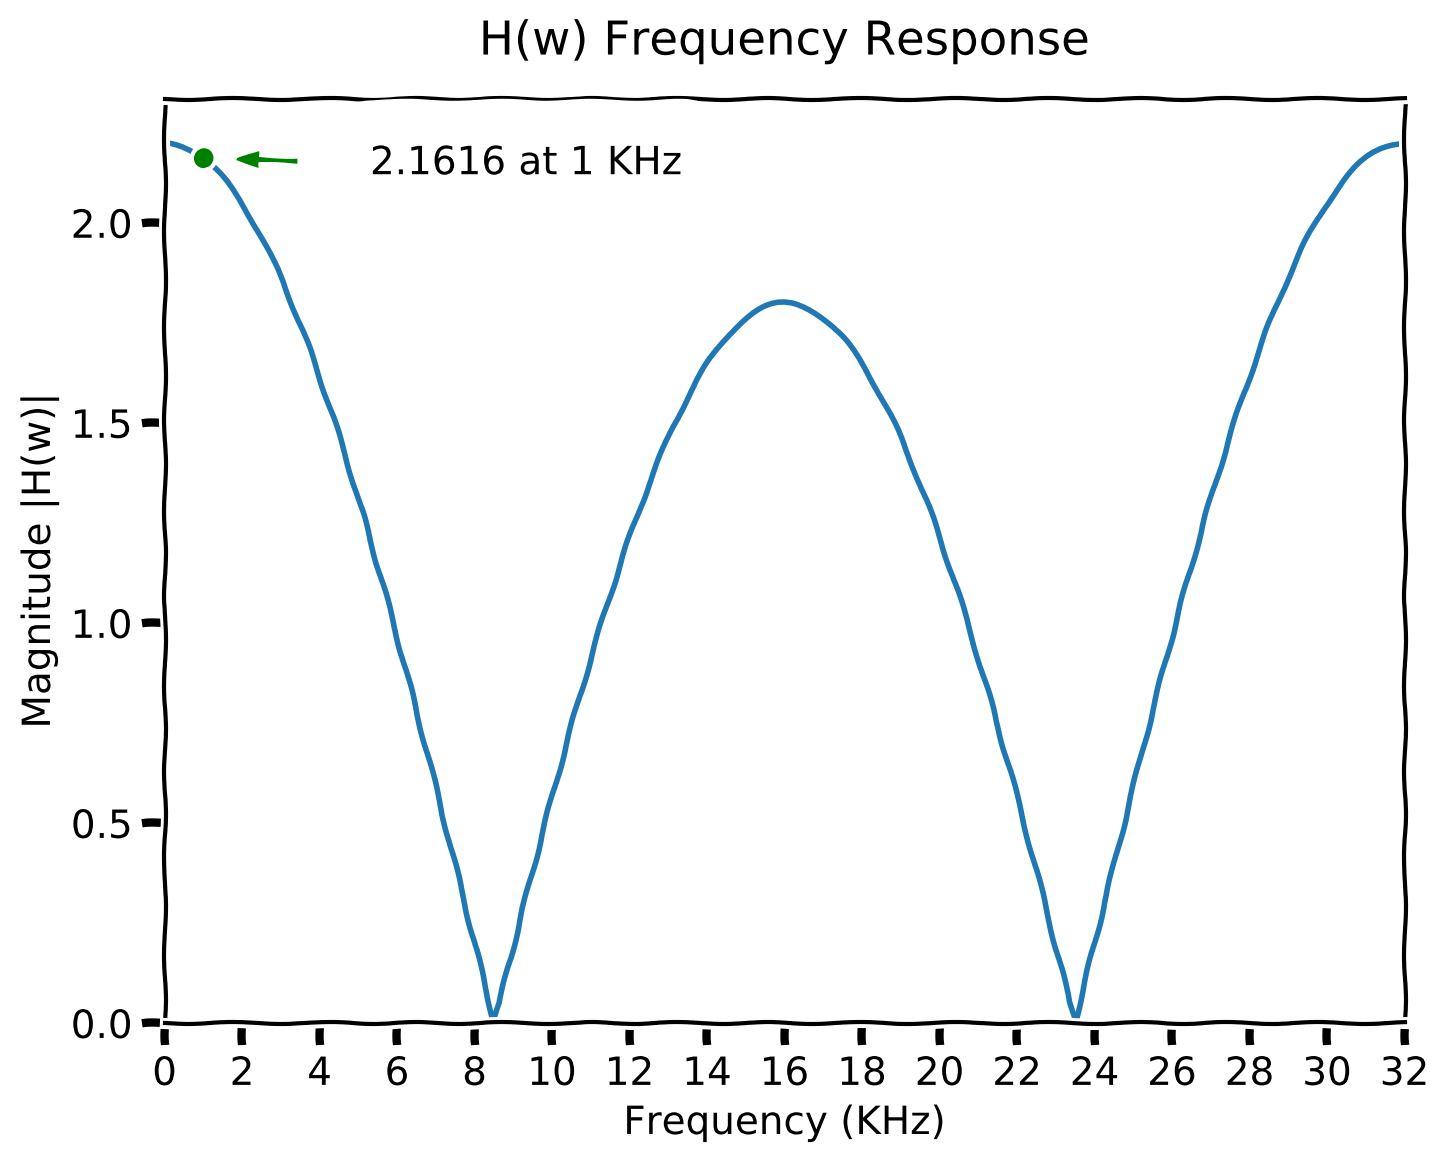

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcdefaults() 
plt.xkcd()

# Reset default params
#sns.set()

# Set context to paper | talk | notebook | poster
#sns.set_context("poster")

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# H(z) = b/a

b = [1, 0.2, 1]   #    z^2 + 0.2z + 1
a = [1, 0, 0]     #         z^2

# create w array which travels around unit circle

w = np.linspace(0, 2*np.pi, 201)    # for evauluating H(w)
z = np.exp(1j*w)

f = np.linspace(0, 32, 201)         # for ploting H(w)

# evalue H over the w array

H = np.polyval(b, z) / np.polyval(a, z)

# plot the magnitude of H vs frequency.  H is a complex number array.

plt.plot(f, np.absolute(H))

# plot frequency point

sample = 32 # KHz
freq = 1 # KHz
angle = (freq/sample) * 2 * np.pi
frequency = np.exp(1j*angle)

Hf = np.polyval(b, frequency) / np.polyval(a, frequency)
Hf = np.absolute(Hf)

plt.plot(freq, Hf, 'og')

# call out frequency point

text = "{0:0.4f} at {1:0.0f} KHz".format(Hf, freq)

ax.annotate(text,
            xy=(freq, Hf), 
            xycoords='data',
            xytext=(60, 5), 
            textcoords='offset points',
            va='top',
            ha='left',
            bbox=dict(facecolor='w', 
                        edgecolor='none', 
                        boxstyle='round,pad=1'
                     ),
            arrowprops=dict(facecolor='g', 
                            edgecolor = 'g',
                            width = 2,
                            linewidth = 0, 
                            shrink=0.2, 
                            headwidth = 6,
                            headlength = 8,
                            )       
            )

# add lables

plt.title("H(w) Frequency Response",y=1.03)
plt.xlabel("Frequency (KHz)")
plt.ylabel("Magnitude |H(w)|");
plt.xlim(0, 32)
plt.xticks(np.linspace(0, 32, 17))   # I want every 2 KHz
plt.ylim(ymin=0)                     # let ymax auto scale
plt.grid()
    
plt.show()